# Solution of assignment "Multiple Scattering"
This is the coded solution.

### Part two: Coulomb & large-angle hard scattering 
We simulate two processes:

 * low-angle multiple scattering: occuring most of the time
 * large-angle hard scatters (HS): rare event
 
The low-angle multiple scattering: angles follow a uniform distrinution, centered at zero and spread $p_1 = | \pm \theta_\text{max}$. 

The scattered angles from the hard scattering are distributed according to a double-triangular distribution. This distribution is centered at zero and of side: $p_2 = | \pm 2\theta_\text{max, hard scatter}|$. The large-angle scattering is a rare process, at a fraction $p_3$. We assume it occurs less than 3\% of the time but we do not know this precisely.


| Parameter                                 | Naming    | Value | Unit    |
|-------------------------------------------|-----------|-------|---------|
| $|\pm \theta_\text{max}|$                 | $p_1$     | ---   | degree  |
| $|\pm 2 \theta_\text{max, hard scatter}|$ | $p_2$     | ---   | degree  |
| Frequency of hard scattering              | $p_3$     | 0.063 | percent |
 
Let's generate the data.

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

%reload_ext autoreload
import toyTracker as tk
import DoubleTriangularGenerator as DTG

#==================================================================
# GENERATING THE DATA 
finalDevsCS = [] 
finalDevsHS = []
# For checks & info:
finalDevs   = [] # should be the sum of the two
thetaCSvals = []   # storing the angles Coulomb Scattering
thetaHSvals = []   # storing the angles large Rutherford Scattering

N_tracks    = 5000
#==================================================================
# THE PARAMETERS:
p1 = 2.95
p2 = 29
p3 = 0.027
#==================================================================
# Config of toy tracker:
minx      = -2.
maxx      = +2.
N_layers  =  12

# Plotting tools
blues    = ['navy', 'blue', 'royalblue', 'deepskyblue', 'skyblue']
greens   = ['green', 'forestgreen', 'limegreen','yellowgreen','palegreen']
histoConf = dict(histtype='stepfilled', alpha=0.75 , ec="k")
plt.rcParams['font.size'] = 18
plt.rcParams['legend.frameon'] = False
#==================================================================
#
fig, ax   = tk.buildDetector(N_layers, minx, maxx)
nBins     = 200

#==================================================================
# Function to get the deflection:
def getDeflectionWithAngle(angleInDegrees, distanceLayers=1):

    deflection = np.tan(np.deg2rad(angleInDegrees)) * distanceLayers

    return deflection

#==================================================================

# Loop over tracks:
for t in range(N_tracks):
    
    trackXvals  = []   # storing the current track X coordinates
    trackYvals  = []   # storing the current track Y corrdinates

    
    # source of particle hits first layer at detector origin with incident angle 0
    x0      = 0
    y0      = 0

    trackXvals.append(x0)
    trackYvals.append(y0)
    
    isHS = False # by default tracks are small-angle scattering
    
    for l in range(N_layers):

        # Get track coordinate at current layer l
        x_layer = trackXvals[-1]
        y_layer = trackYvals[-1]

        #------------------------------------
        # Hard scattering process
        #------------------------------------
        # let's get a random number from 0 and 1 and see if it falls below p3:
        if random.uniform(0,1) < p3:
            # Hard scattering:
            new_angle = DTG.getPRandomDoubleTriangular(p2)
            isHS = True
            thetaHSvals.append(new_angle)

        #------------------------------------
        # Coulomb multiple scattering
        #------------------------------------
        else: # Coulomb
            new_angle = 2 * p1 * random.uniform(0 , 1) - p1
            thetaCSvals.append(new_angle)
        
        #------------------------------------
        
        # Compute the horizontal deviation (deltaX) on next layer: 
        deviation = getDeflectionWithAngle(new_angle)

        # Store coordinates on next layer
        y_next = y_layer + 1
        x_next = x_layer + deviation
        trackYvals.append( y_next )
        trackXvals.append( x_next )

        # If on the last layer, store the final deviation (for histogramming later)
        if l == N_layers - 1:
            if isHS:
                finalDevsHS.append( x_next)
            else:
                finalDevsCS.append( x_next)
            finalDevs.append( x_next )
    
    #----------------------------------------------
    # Done with track, let's plot it!
    #----------------------------------------------
    if isHS: # green!
        ax[0].plot( trackXvals, trackYvals, color=greens[t%len(greens)])
    else:
        ax[0].plot( trackXvals, trackYvals, color=blues[t%len(blues)])

    # Print info:
    if(t%100==0):
        print("   Track i = % 4d\tFinal angle = %.1f\tDefletion = %.3f\tHS? %r" %(t, new_angle, x_next, isHS))

# Plot distributions on deflection plot:
# Total = black dots
n, binArray, patches = ax[1].hist([finalDevsHS,finalDevsCS], nBins, range=[minx, maxx], stacked=True, color=['limegreen','deepskyblue'],**histoConf) 

# Check with total distribution
histFinalDevs, binVals  = np.histogram(finalDevs, nBins, range=[minx, maxx])
ax[1].plot(binVals[:-1], histFinalDevs, '.', c='gray')
    
fig.tight_layout()
fig.canvas.draw()
fig.savefig("tracker_AllScatt_%d_tracks.png"%N_tracks)


   Track i =    0	Final angle = -0.0	Defletion = 0.132	HS? True
   Track i =  100	Final angle = -0.4	Defletion = 0.167	HS? False
   Track i =  200	Final angle = 2.1	Defletion = 0.154	HS? False
   Track i =  300	Final angle = 0.3	Defletion = -0.084	HS? False
   Track i =  400	Final angle = 0.3	Defletion = 0.065	HS? False
   Track i =  500	Final angle = -1.0	Defletion = -0.156	HS? True
   Track i =  600	Final angle = -0.6	Defletion = -0.197	HS? False
   Track i =  700	Final angle = 2.9	Defletion = 0.097	HS? False
   Track i =  800	Final angle = -2.4	Defletion = 0.141	HS? False
   Track i =  900	Final angle = 1.3	Defletion = -0.045	HS? False
   Track i =  1000	Final angle = 0.2	Defletion = -0.172	HS? True
   Track i =  1100	Final angle = 1.6	Defletion = -0.044	HS? False
   Track i =  1200	Final angle = -0.3	Defletion = 0.006	HS? False
   Track i =  1300	Final angle = -0.0	Defletion = 0.052	HS? False
   Track i =  1400	Final angle = -2.1	Defletion = 0.314	HS? True
   Track i =  1500	Final 

Let's save this in a text file.

In [4]:
for i in range(len(finalDevs)):
    print("track%05d\t%.5f"%(i, finalDevs[i]))
    

track00000	-0.03177
track00001	-0.34087
track00002	-0.05811
track00003	-0.14391
track00004	0.22289
track00005	0.05751
track00006	-0.35102
track00007	-0.13937
track00008	-0.05865
track00009	0.14124
track00010	0.03916
track00011	-0.08222
track00012	0.16202
track00013	-0.00941
track00014	-0.13692
track00015	-0.34166
track00016	0.39779
track00017	0.16131
track00018	0.01820
track00019	-0.23890
track00020	-0.17201
track00021	-0.20767
track00022	-0.35329
track00023	-0.29981
track00024	0.12369
track00025	0.02443
track00026	-0.15619
track00027	-0.01399
track00028	0.10436
track00029	0.15091
track00030	0.16436
track00031	-0.13582
track00032	-0.13816
track00033	-0.08848
track00034	0.12493
track00035	-0.49518
track00036	-0.07468
track00037	-0.16765
track00038	-0.45725
track00039	0.08919
track00040	0.27911
track00041	-0.02870
track00042	-0.14867
track00043	-0.13465
track00044	0.42662
track00045	-0.03473
track00046	0.04975
track00047	-0.11277
track00048	-0.02497
track00049	0.21483
track00050	0.03421


track02753	0.03640
track02754	-0.32662
track02755	-0.07232
track02756	-0.11634
track02757	0.02440
track02758	0.06476
track02759	0.05148
track02760	-0.02673
track02761	-0.01498
track02762	-0.16794
track02763	0.01224
track02764	-0.03594
track02765	-0.04608
track02766	-0.19803
track02767	-0.23015
track02768	-0.07764
track02769	-0.00424
track02770	-0.02045
track02771	0.02944
track02772	0.01611
track02773	-0.08031
track02774	0.11477
track02775	-0.05479
track02776	-0.33167
track02777	-0.05903
track02778	-0.07065
track02779	0.22465
track02780	-0.24314
track02781	0.10214
track02782	0.04026
track02783	0.24040
track02784	0.01717
track02785	0.06326
track02786	-0.01166
track02787	-0.07932
track02788	0.03944
track02789	0.64982
track02790	0.01729
track02791	0.08785
track02792	0.01197
track02793	0.19409
track02794	0.06381
track02795	-0.36603
track02796	-0.33387
track02797	-0.21075
track02798	-0.00808
track02799	-0.05575
track02800	0.06406
track02801	0.00787
track02802	0.03041
track02803	0.15571
track

Let's get the data:

In [19]:
def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        col1 = []
        col2 = []
        for line in data:
            p = line.split()
            col1.append(str(p[0]))
            col2.append(float(p[1]))
    return col1, col2

trackIDs, obsDevs = Read_Two_Column_File("data_tracker_run2.txt")

Let's check if the Coulomb and hard scattering angles are distributed uniformly and according to a double triangle distribution, respectively.


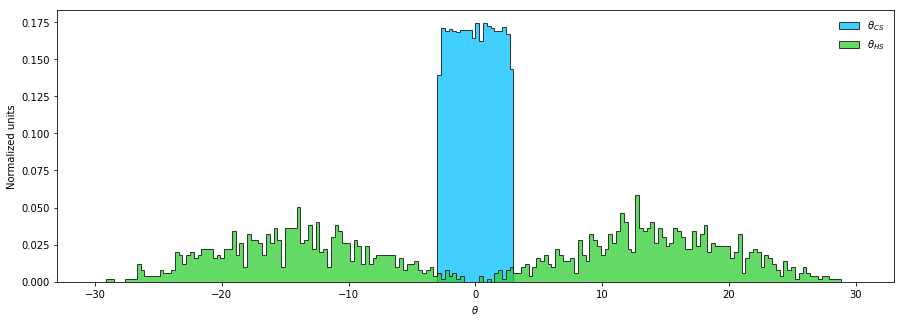

In [11]:
fig2 = plt.figure(figsize=(15,5))
histoThetaCS, binArrayD, patchesD = plt.hist(thetaCSvals, 200, range=[-30., 30], label=r'$\theta_{CS}$', density=True, color='deepskyblue', **histoConf)
histoThetaHS, binArrayD, patchesD = plt.hist(thetaHSvals, 200, range=[-30., 30], label=r'$\theta_{HS}$', density=True, color='limegreen', **histoConf)
plt.xlabel(r'$\theta$')
plt.ylabel('Normalized units')
plt.legend()
fig2.show()

fig2.savefig("tracker_AllScatt_%d_tracks_thetas.png"%N_tracks)

Looks right!
Now let's try several values of $p_1, p_2, p_3$ to reproduce the observations.

First step: as the hard scattering events are rare, I will first set $p_3$ to zero and focus on getting a good estimate for $p_1$. For this I use a more elaborate version of my Tracker Simulator: Tracker Simulator II (it's coming back!) Have a look at the methods there.

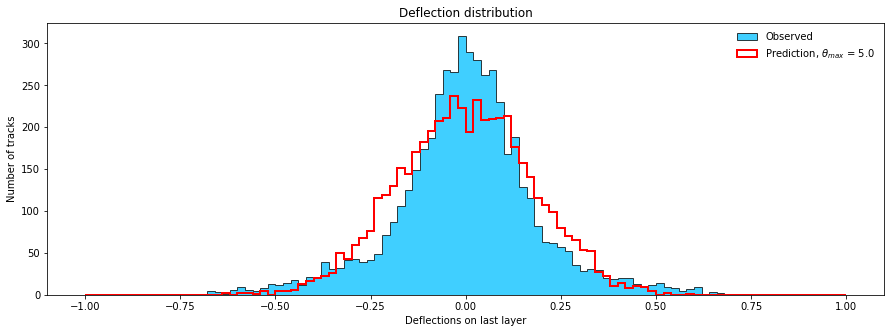

In [20]:
%reload_ext autoreload
import toyTracker as tk
import TrackerSimulator2 as tkSim

theta_max_guess = 5
nBins2 = 100

# Parameter 2 is dummy: will have no influence because p3 is zero: we will never have any hard scatter
predDevs, predDevsCS, predDevsHC = tkSim.getDeflectionsAllTracks( N_layers, N_tracks, theta_max_guess , 1, 0)


fig2 = plt.figure(figsize=(15,5))
plt.title('Deflection distribution')
plt.xlabel('Deflections on last layer')
plt.ylabel('Number of tracks')
# Overlaying data (D) and guessed (G) distribution
nObs,  binArrayObs,  patchesObs  = plt.hist(obsDevs,nBins2, range=[minx, maxx], label='Observed', color='deepskyblue', **histoConf)
nPred, binArrayPred, patchesPred = plt.hist(predDevs, nBins2, range=[minx, maxx], label=r'Prediction, $\theta_{max}$ = %.1f'%theta_max_guess,color='red', histtype='step', lw=2)
plt.legend()
fig2.show()

Need to reduce the spread. Let's compute the $\sum \chi^2$ for several $p_1$.

In [16]:
def getSumChiSquared(listPredictions, listObservations, nb_bins, minx, maxx):
    
    # Check of my inputs:
    if len(listPredictions) < 1 or len(listObservations) < 1 or nb_bins < 1:
        print("Problem with sizes of inputs. Check. Returning -1.")
        return -1
    
    # Let's bin the list. I use the numpy methods.
    histPreds, binEdges  = np.histogram(listPredictions,  nb_bins, range=[minx, maxx])
    histObs  , binEdges2 = np.histogram(listObservations, nb_bins, range=[minx, maxx])
    
    sumChi2 = 0
    
    for i in range(len(histPreds)):
        
        if histPreds[i] == 0:
            currentChi2 = 0
        else:
            currentChi2 = ((histPreds[i] - histObs[i])**2)/(histPreds[i])
            sumChi2 += currentChi2
            
    return sumChi2

Now shooting tracks to get the chi squares for some predicted $p_1$.

I will not plot each time, just the final chi-square to know where it is minimum.

In [37]:
def getSumChiSquaredList(obsData, list_preds_p1, list_preds_p2, list_preds_p3, N_layers, N_tracks, nBins, minx, maxx):
    
    sumChi2_preds   = []
    
    for i in range(len(list_preds_p1)):
    
        # Shoot tracks and fill list of predictions for p1
        thisPredDevs, a, b = tkSim.getDeflectionsAllTracks( N_layers, N_tracks, list_preds_p1[i], 0., 0. )
    
        # Compare this with the observation:
        current_sumChi2 = getSumChiSquared(thisPredDevs, obsData, nBins, minx, maxx)
    
        # I divide by the number of bins in the histogram (known as number of degrees of freedom, ndf)
        sumChi2_preds.append(current_sumChi2/nBins)
        
    
    return sumChi2_preds 



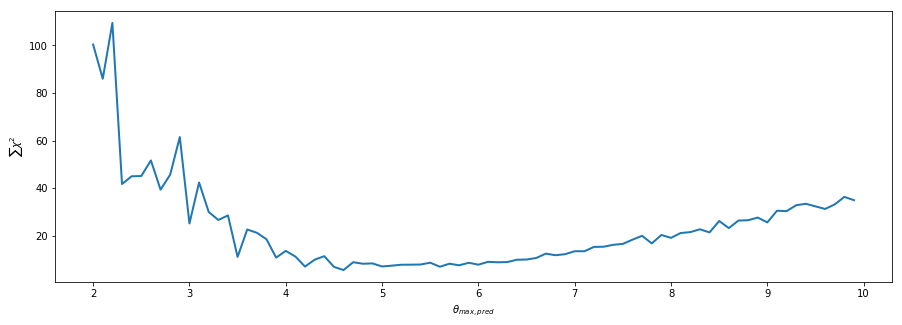

In [38]:
nBins = 100
minx = -1.
maxx = +1.

# Trying some values for p1, p2 and p3 ignored.
theta_max_preds = np.arange(2,10,0.1)
empty_p2        = []
empty_p3        = []
sumChi2_preds   = getSumChiSquaredList(obsDevs, theta_max_preds, empty_p2, empty_p3, N_layers, N_tracks, nBins, minx, maxx)

fig = plt.figure(figsize=(15,5))
plt.plot(theta_max_preds, sumChi2_preds, lw=2)
plt.xlabel(r"$\theta_{max,pred}$")
plt.ylabel(r"$\sum \chi^2$")
fig.savefig("graph_sumChi2_vs_predThetas_part2.png")


The parameter $p_1$ seems to be between 5 and 6, but this is without taking into account the fact that there are non-Gaussian tails in the observed distribution.

I will reduce the fitting range $x_\text{min}$ and $x_\text{max}$.

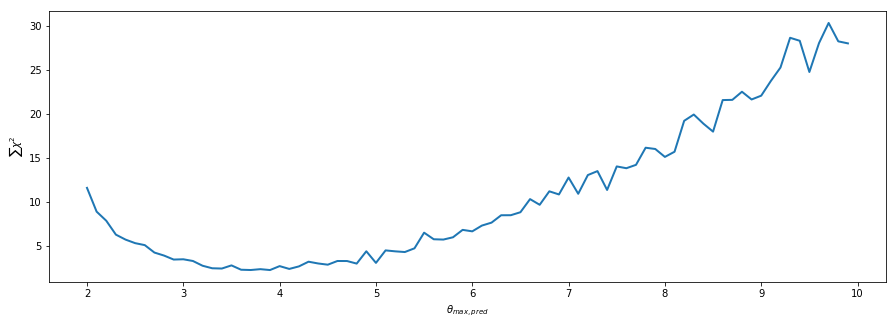

In [39]:
nBins = 100
minx = -0.15
maxx = +0.15

# Trying some values for p1, p2 and p3 ignored.
theta_max_preds = np.arange(2,10,0.1)
empty_p2        = []
empty_p3        = []
sumChi2_preds   = getSumChiSquaredList(obsDevs, theta_max_preds, empty_p2, empty_p3, N_layers, N_tracks, nBins, minx, maxx)

fig = plt.figure(figsize=(15,5))
plt.plot(theta_max_preds, sumChi2_preds, lw=2)
plt.xlabel(r"$\theta_{max,pred}$")
plt.ylabel(r"$\sum \chi^2$")
fig.savefig("graph_sumChi2_vs_predThetas_part2_restrictXrange.png")

I set $p_1$ around 4 and fill a 2D array of $p_2$ and $p_3$. 
I will modify the function getSumChiSquaredList:

In [68]:
def getSumChiSquaredList(obsData, list_preds_p1, list_preds_p2, list_preds_p3, N_layers, N_tracks, nBins, minx, maxx):
    
    sumChi2_preds_p2p3   = []
    
    for i in range(len(list_preds_p2)):
        
        list_preds_p3_this_p2 = []
        
        for j in range(len(list_preds_p3)):
                        
            # Shoot tracks and fill list of predictions for p2
            thisPredDevs, a, b = tkSim.getDeflectionsAllTracks( N_layers, N_tracks, list_preds_p1[0], list_preds_p2[i], list_preds_p3[j] )
    
            # Compare this with the observation:
            current_sumChi2 = getSumChiSquared(thisPredDevs, obsData, nBins, minx, maxx)
    
            # I divide by the number of bins in the histogram (known as number of degrees of freedom, ndf)
            list_preds_p3_this_p2.append(current_sumChi2/nBins) 
        
        sumChi2_preds_p2p3.append(list_preds_p3_this_p2)
        #print("CHECK\ti = %d, j = %d length list inside = %d"%(i, j, len(sumChi2_preds_p2p3[-1])))
    
    return  sumChi2_preds_p2p3


[[2.4642411998544573, 2.5672180754573115, 2.289097653527228, 2.414627290551993, 2.2017077018779143], [2.387875163315108, 2.8349152774688577, 2.7646159857406865, 2.6648202349461045, 2.7061799260055874], [2.0593281789402327, 2.5720986226546705, 3.2573821827699962, 3.0200872200797955, 3.8064675620513775], [2.3083564308380278, 2.8164297840465378, 3.7809647054285818, 4.638019998807837, 3.651098874546907], [2.7559192019203262, 2.5537965922101766, 3.0409723153531987, 3.4079128696565992, 4.503097512647221], [2.6846564934505155, 2.645800706765684, 3.7558610452339485, 3.707695500184146, 5.375369359062263], [2.0271051113376037, 3.348969703938918, 3.816247400689237, 4.515049109797062, 4.465124899208999], [1.995817589416908, 2.789948794841083, 4.426114269045673, 4.959501031986845, 4.388048782571337]]


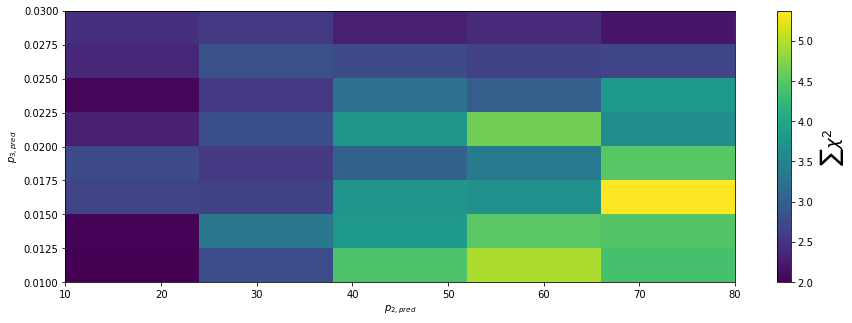

In [67]:
import matplotlib.cm as cm

nBins = 100
minx = -0.15
maxx = +0.15

# Trying some values for p2 and p3, p1 set to 3.8 
preds_p1 = [3.8]; 
preds_p2 = 
preds_p3 = [0.01, 0.015, 0.02, 0.025, 0.03]

sumChiPreds_p2p3 = getSumChiSquaredList(obsDevs, preds_p1, preds_p2, preds_p3, N_layers, N_tracks, nBins, minx, maxx)

#fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,5))
cax = ax.imshow(sumChiPreds_p2p3, extent=(min(preds_p2), max(preds_p2),  min(preds_p3), max(preds_p3)), aspect='auto')

plt.xlabel(r"$p_{2,pred}$")
plt.ylabel(r"$p_{3,pred}$")
cbar = fig.colorbar(cax)
cbar.set_label(r'$\sum \chi^2$',size=18)
fig.savefig("graph2D_sumChi2_vs_p2_p3_part2.png")
